<a href="https://colab.research.google.com/github/amrit-thapa-2044/colab_miscellaneous/blob/main/IMD_data_download_amrit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<div align="center"><font size="20">Downloading IMD data</font>**

Prepared by: Amrit Thapa \
Email: aamritjnu@gmail.com
GitHub: https://github.com/amrit-thapa-2044

---

# Background

The purpose of this notebook is to guide you through the process of downloading daily historical precipitation (0.25 by 0.25) and temperature (1 by 1) dataets developed by the Indian Meteorological Division (IMD) for India. More information about the dataset can be found [here](https://www.imdpune.gov.in/Clim_Pred_LRF_New/Grided_Data_Download.html). 



We make use of python package named ***IMDLIB*** developed by [Nandi and Patel (2020)](https://doi.org/10.5281/zenodo.4405232)

Detail about the package can be obtained from this [link](https://github.com/iamsaswata/imdlib) 

# Install IMDLIB package
Users must install the imdlib package since it is not included in the Python included with Colab Notebook. Let's install the development version.

In [1]:
!pip install git+https://github.com/iamsaswata/imdlib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/iamsaswata/imdlib.git to /tmp/pip-req-build-tje6pz2u
  Running command git clone -q https://github.com/iamsaswata/imdlib.git /tmp/pip-req-build-tje6pz2u
  Created wheel for imdlib: filename=imdlib-0.1.12-py3-none-any.whl size=8564 sha256=1a829173c0c949321c56e856281ecc607401a44dc86b9571e6b27bbe43db4510
  Stored in directory: /tmp/pip-ephem-wheel-cache-zm5raya8/wheels/aa/a0/06/f8ab34f27f6f9e8f0492ee2d419324e4e129d7e1e2a9401e46
Successfully built imdlib


In [2]:
# load required package
import imdlib as imd

# Define user variables
In this section, we define the time frame that we are interested in. Additionally, we will create two variables file_dir and output_filename to specify the input directory and create the output filename to download the data.

In [3]:
start_yr = 2016
end_yr = 2017 # should be equal to or greater than  start_yr
variable = 'tmax' # options are ('rain'/'tmin'/ 'tmax')

In [4]:
file_dir='/content/'+variable
print(file_dir)

/content/tmax


In [5]:
output_filename='IMD_data_'+variable+'_'+str(start_yr)+'_'+str(end_yr)+'.nc'
print(output_filename)

IMD_data_tmax_2016_2017.nc


# Download data within colab
Let's download the data using the get_data function from the imdlib package.

In [6]:
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise')

Downloading: maxtemp for year 2016
Downloading: maxtemp for year 2017
Download Successful !!!


# Convert data to xarray object
The output file is in binary format. In the following code, the data is converted into an xarray to make it easier to visualize and download.

In [7]:
ds = data.get_xarray()
print(ds)

<xarray.Dataset>
Dimensions:  (time: 731, lat: 31, lon: 31)
Coordinates:
  * lat      (lat) float64 7.5 8.5 9.5 10.5 11.5 ... 33.5 34.5 35.5 36.5 37.5
  * lon      (lon) float64 67.5 68.5 69.5 70.5 71.5 ... 93.5 94.5 95.5 96.5 97.5
  * time     (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2017-12-31
Data variables:
    tmax     (time, lat, lon) float64 99.9 99.9 99.9 99.9 ... 99.9 99.9 99.9
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2022-07-03 09:08:15.719591 Python
    references:   
    comment:      
    crs:          epsg:4326


# Visualize data

To get an idea of the data, let's visualize it. We should first remove missing values in the data, which correspond to -999.0 for rain and 99.9 for temperature.

In [8]:
if variable == 'rain':
    ds = ds.where(ds[variable] != -999.) #Remove NaN values
else:
    ds = ds.where(ds[variable] < 99.9) #Remove NaN values

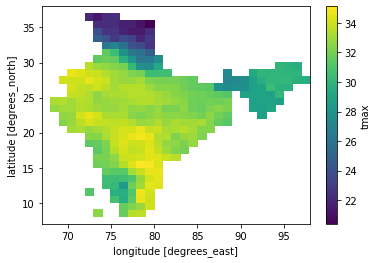

In [9]:
ds[variable].mean('time').plot()

# Convert to netCDF format

We converted data to xarray in the previous section. To export the file , let's convert xarray to netCDF. 

In [10]:
data.to_netcdf(output_filename, file_dir)

# Dowload data lo local machine

To download the nc file we just created, we used the file.download function from the google.colab package.

In [11]:
from google.colab import files
files.download(file_dir+'/'+output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Keep in Mind**

* (-999.0) represents missing values in the rain data downloaded
* 99.9 represents missing values in the temperature data downloaded

You can further process the data using any GIS software.


**<div align="center"><font size="20">Good Luck</font>**